# Covid19 Case Study

## Background

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, emerged in late 2019 and rapidly spread globally, leading to significant health, economic, and social impacts. This unprecedented health crisis highlighted the crucial role of data analysis in managing such pandemics. By meticulously tracking and analyzing data on confirmed cases, recoveries, and deaths, policymakers and health professionals can make informed decisions to control the spread of the virus and allocate resources effectively.

## Dataset Details

This case study utilizes three key datasets, each providing daily updates on different aspects of the pandemic for various countries and regions:

- Confirmed Cases Dataset: This dataset contains the cumulative number of confirmed COVID-19 cases per day for each country and region. The data spans from January 22, 2020, to May 29, 2021, with over 276 geographic entries.
- Deaths Dataset: This dataset records the cumulative number of deaths attributed to COVID-19, structured similarly to the confirmed cases dataset. It provides crucial information for assessing the lethality and outbreak severity in different areas.
- Recovered Cases Dataset: Includes data on the cumulative number of individuals who have recovered from COVID-19, which is vital for understanding the disease's progression and the effectiveness of treatment protocols.

Each dataset includes columns for Province/State, Country/Region, geographic coordinates (Lat, Long), and a series of dates representing daily cumulative totals.

## Objective of the Case Study

The primary objectives of this case study are:

- Practical Application of Python: To demonstrate and enhance practical skills in using Python for data analysis, focusing on data manipulation, cleaning, and visualization.
- Insightful Data Analysis: To provide analytical insights into the dynamics of COVID-19's spread, recovery, and mortality rates across different regions and over time.
- Skill Development: To equip students with the knowledge to handle real-world data using Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and Numpy for numerical data processing.


## 1. Setup Environment

Before running this notebook, ensure you have a Python virtual environment in the `.venv` folder and the required packages installed:

- pandas
- numpy
- matplotlib
- seaborn
- plotly

You can set up the environment with the following commands:

```bash
python3 -m venv .venv
source .venv/bin/activate
pip install pandas numpy matplotlib seaborn plotly
```


In [5]:
!pip install pandas numpy matplotlib seaborn plotly

Expected ';', '}' or <eof> at file:///repl.tsx:1:6

  !pip install pandas numpy matplotlib seaborn plotly
       ~~~~~~~: Expected ';', '}' or <eof> at file:///repl.tsx:1:6

  !pip install pandas numpy matplotlib seaborn plotly
       ~~~~~~~

## 2. Import Required Libraries

Import all necessary libraries for data manipulation, visualization, and analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from IPython.display import display

# Optional: Configure visualizations
# Sets the aesthetic style of the plots
sns.set_style('whitegrid')
# Uses the 'fivethirtyeight' style for matplotlib plots, known for its clear and informative look
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 6)
# Ensures that Matplotlib plots are displayed inline in the Jupyter Notebook
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


### Q1.1: How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?

In [ ]:
def load_and_display_csv(file_path, dataset_name, n=5):
    try:
        df = pd.read_csv(file_path)
        print(f"{dataset_name}:")
        display(df.head(n))
        print()  # Blank line for spacing
        return df
    except FileNotFoundError:
        print(f"Error: {dataset_name} file not found at path: {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while loading {dataset_name}: {e}")
        return None

# Usage
confirmed_df = load_and_display_csv('covid_19_confirmed_v1.csv', 'Confirmed Cases')
deaths_df = load_and_display_csv('covid_19_deaths_v1.csv', 'Deaths')
recovered_df = load_and_display_csv('covid_19_recovered_v1.csv', 'Recovered')

if all(df is not None for df in [confirmed_df, deaths_df, recovered_df]):
    print("All datasets loaded successfully!")
else:
    print("One or more datasets failed to load.")

Confirmed Cases:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180



Deaths:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757



Recovered:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646



All datasets loaded successfully!


### Q2.1: After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?

In [ ]:
def print_dataset_info(df, name):
    print(f'{name} Dataset:')
    print(f'Shape: {df.shape} (rows, columns)')
    print('Data Types:')
    print(df.dtypes)
    print('\n')

# Usage
print_dataset_info(confirmed_df, 'Confirmed Cases')
print_dataset_info(deaths_df, 'Deaths')
print_dataset_info(recovered_df, 'Recovered')

Confirmed Cases Dataset:
Shape: (276, 498) (rows, columns)
Data Types:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object


Deaths Dataset:
Shape: (276, 498) (rows, columns)
Data Types:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object


Recovered Dataset:
Shape: (261, 498) (rows, columns)
Data Types:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21         

### Q2.2: Generate plots of confirmed cases over time for the top countries.

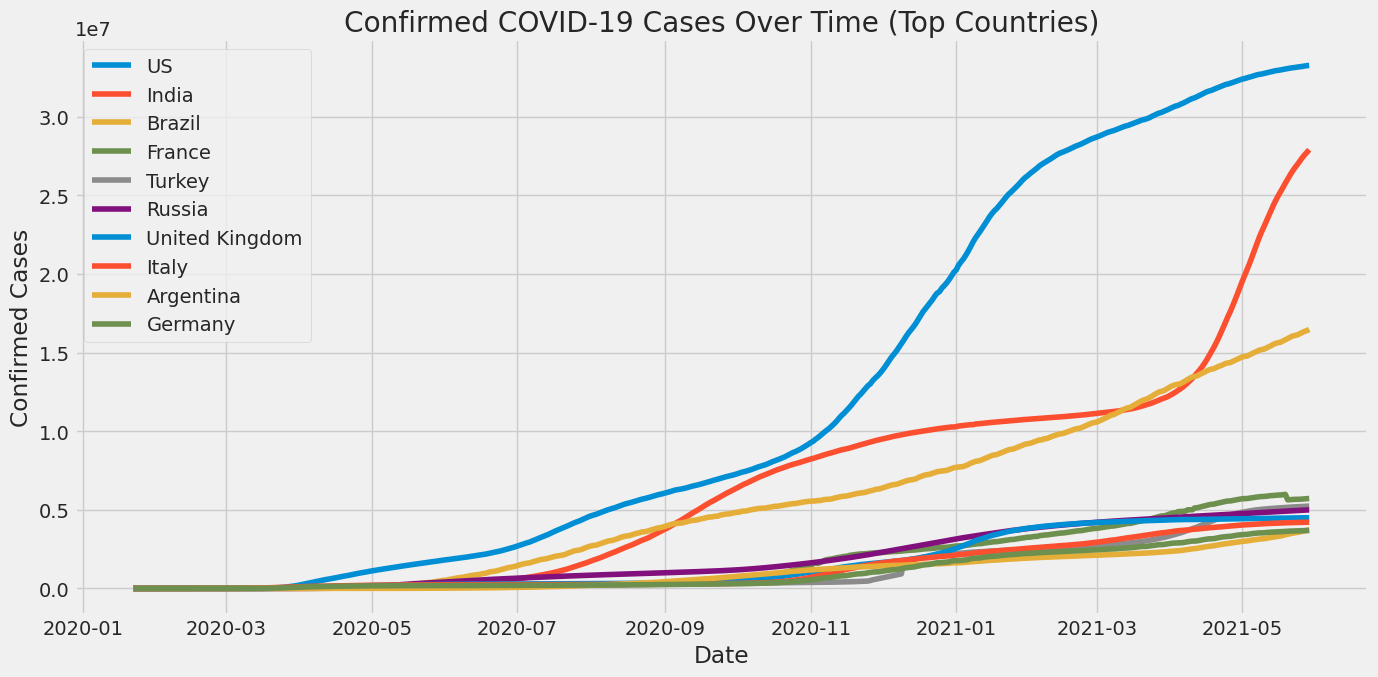

In [ ]:
def aggregate_confirmed_by_country(df):
    country_df = df.drop(columns=["Province/State", "Lat", "Long"], errors='ignore')
    country_df = country_df.groupby("Country/Region").sum()
    return country_df

def get_top_countries_by_confirmed(country_df, top_n=10):
    total_cases = country_df.iloc[:, -1].sort_values(ascending=False)
    return total_cases.head(top_n).index.tolist()

def plot_confirmed_cases_over_time(country_df, top_countries):
    df = country_df.loc[top_countries].transpose()
    df.index = pd.to_datetime(df.index, format='%m/%d/%y')
    plt.figure(figsize=(14, 7))
    for country in top_countries:
        plt.plot(df.index, df[country], label=country)
    plt.title("Confirmed COVID-19 Cases Over Time (Top Countries)")
    plt.xlabel("Date")
    plt.ylabel("Confirmed Cases")
    plt.legend()
    plt.tight_layout()
    plt.show()

confirmed_by_country = aggregate_confirmed_by_country(confirmed_df)
top_countries = get_top_countries_by_confirmed(confirmed_by_country, top_n=10)
plot_confirmed_cases_over_time(confirmed_by_country, top_countries)

### Q2.3: Generate plots of confirmed cases over time for China.

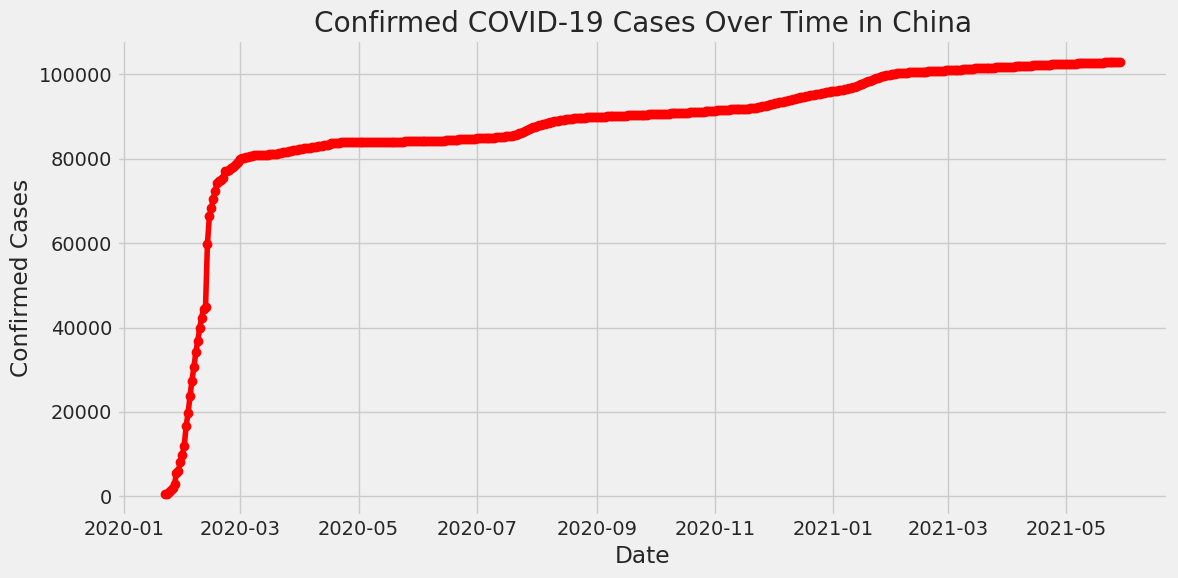

In [ ]:
def plot_confirmed_cases_china(df):
    # Filter for China
    china_df = df[df["Country/Region"] == "China"]

    # Drop unnecessary columns
    china_df = china_df.drop(columns=["Lat", "Long", "Province/State"], errors="ignore")

    # Sum over all provinces/states
    china_series = china_df.drop(columns=["Country/Region"]).sum()

    # Convert index to datetime using known format
    china_series.index = pd.to_datetime(china_series.index, format='%m/%d/%y')

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(china_series.index, china_series.values, marker='o', color='red')
    plt.title("Confirmed COVID-19 Cases Over Time in China")
    plt.xlabel("Date")
    plt.ylabel("Confirmed Cases")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_confirmed_cases_china(confirmed_df)

### Q3.1: Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

In [ ]:
def check_missing_values(df, name="Dataset"):
    print(f"Missing values in {name}:")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    print("\nTotal missing cells:", df.isnull().sum().sum())

def impute_missing_values(df):
    # Forward fill, then backward fill, then infer correct dtypes
    return df.ffill().bfill().infer_objects(copy=False)

# Check for missing values before imputation
check_missing_values(confirmed_df, "Confirmed Cases")
check_missing_values(deaths_df, "Deaths")
check_missing_values(recovered_df, "Recovered")

# Impute missing values
confirmed_df = impute_missing_values(confirmed_df)
deaths_df = impute_missing_values(deaths_df)
recovered_df = impute_missing_values(recovered_df)

# Confirm no missing values remain
check_missing_values(confirmed_df, "Confirmed Cases (After Imputation)")
check_missing_values(deaths_df, "Deaths (After Imputation)")
check_missing_values(recovered_df, "Recovered (After Imputation)")

Missing values in Confirmed Cases:
Province/State    190
Lat                 2
Long                2
dtype: int64

Total missing cells: 194
Missing values in Deaths:
Province/State    190
Lat                 2
Long                2
4/20/20             1
dtype: int64

Total missing cells: 195
Missing values in Recovered:
Province/State    191
Lat                 1
Long                1
4/20/20             1
dtype: int64

Total missing cells: 194
Missing values in Confirmed Cases (After Imputation):
Series([], dtype: int64)

Total missing cells: 0
Missing values in Deaths (After Imputation):
Series([], dtype: int64)

Total missing cells: 0
Missing values in Recovered (After Imputation):
Series([], dtype: int64)

Total missing cells: 0


### Q4.1: Replace blank values in the province column with “All Provinces.”

In [ ]:
def replace_blank_provinces(df):
    if "Province/State" in df.columns:
        df["Province/State"] = df["Province/State"].fillna("All Provinces")
        df["Province/State"] = df["Province/State"].replace('', "All Provinces")
    return df

confirmed_df = replace_blank_provinces(confirmed_df)
deaths_df = replace_blank_provinces(deaths_df)
recovered_df = replace_blank_provinces(recovered_df)

### Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

In [ ]:
def analyze_peak_daily_cases(confirmed_df, countries):
    # Melt the dataframe to long format
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']
    df_long = confirmed_df.melt(id_vars=id_vars, var_name='date', value_name='cases')
    # Specify the date format to avoid warning
    df_long['date'] = pd.to_datetime(df_long['date'], format='%m/%d/%y')
    df_long = df_long.groupby(['Country/Region', 'date'])['cases'].sum().reset_index()

    # Filter for specified countries
    df_long = df_long[df_long['Country/Region'].isin(countries)]

    # Calculate daily new cases
    df_long = df_long.sort_values(['Country/Region', 'date'])
    df_long['daily_new_cases'] = df_long.groupby('Country/Region')['cases'].diff().fillna(0)

    # Find peak for each country
    peaks = {}
    for country in countries:
        country_df = df_long[df_long['Country/Region'] == country]
        idxmax = country_df['daily_new_cases'].idxmax()
        peak_value = int(country_df.loc[idxmax, 'daily_new_cases'])
        peak_date = country_df.loc[idxmax, 'date'].date()
        peaks[country] = {'peak_cases': peak_value, 'peak_date': peak_date}

    # Find country with highest single-day surge
    max_country = max(peaks, key=lambda x: peaks[x]['peak_cases'])
    print("Peak daily new cases:")
    for country in countries:
        print(f"{country}: {peaks[country]['peak_cases']} cases on {peaks[country]['peak_date']}")
    print(f"\nHighest single-day surge: {max_country} with {peaks[max_country]['peak_cases']} cases on {peaks[max_country]['peak_date']}")

analyze_peak_daily_cases(confirmed_df, ['Germany', 'France', 'Italy'])


Peak daily new cases:
Germany: 49044 cases on 2020-12-30
France: 117900 cases on 2021-04-11
Italy: 40902 cases on 2020-11-13

Highest single-day surge: France with 117900 cases on 2021-04-11


### Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?

In [ ]:

def compare_recovery_rates(confirmed_df, recovered_df, countries, date_str='12/31/20'):
    # Handle possible column name variations for both dataframes
    def get_country_col(df):
        for col in ['Country/Region', 'Country_Region']:
            if col in df.columns:
                return col
        raise KeyError("Country column not found in dataframe")

    confirmed_country_col = get_country_col(confirmed_df)
    recovered_country_col = get_country_col(recovered_df)

    # Aggregate confirmed and recovered cases for the given date and countries
    confirmed = confirmed_df[confirmed_df[confirmed_country_col].isin(countries)]
    recovered = recovered_df[recovered_df[recovered_country_col].isin(countries)]

    confirmed_total = confirmed.groupby(confirmed_country_col)[date_str].sum()
    recovered_total = recovered.groupby(recovered_country_col)[date_str].sum()

    rates = {}
    for country in countries:
        conf = confirmed_total.get(country, 0)
        rec = recovered_total.get(country, 0)
        rate = rec / conf if conf > 0 else 0
        rates[country] = {'confirmed': int(conf), 'recovered': int(rec), 'recovery_rate': rate}

    print(f"Recovery rates as of {date_str}:")
    for country in countries:
        print(f"{country}: {rates[country]['recovery_rate']:.2%} ({rates[country]['recovered']} recovered / {rates[country]['confirmed']} confirmed)")

    best = max(rates, key=lambda x: rates[x]['recovery_rate'])
    print(f"\n{best} showed better management of the pandemic according to the recovery rate metric.")

# Example usage after loading confirmed_df and recovered_df:
compare_recovery_rates(confirmed_df, recovered_df, ['Canada', 'Australia'])


Recovery rates as of 12/31/20:
Canada: 84.47% (493638 recovered / 584409 confirmed)
Australia: 79.38% (22565 recovered / 28425 confirmed)

Canada showed better management of the pandemic according to the recovery rate metric.


### Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

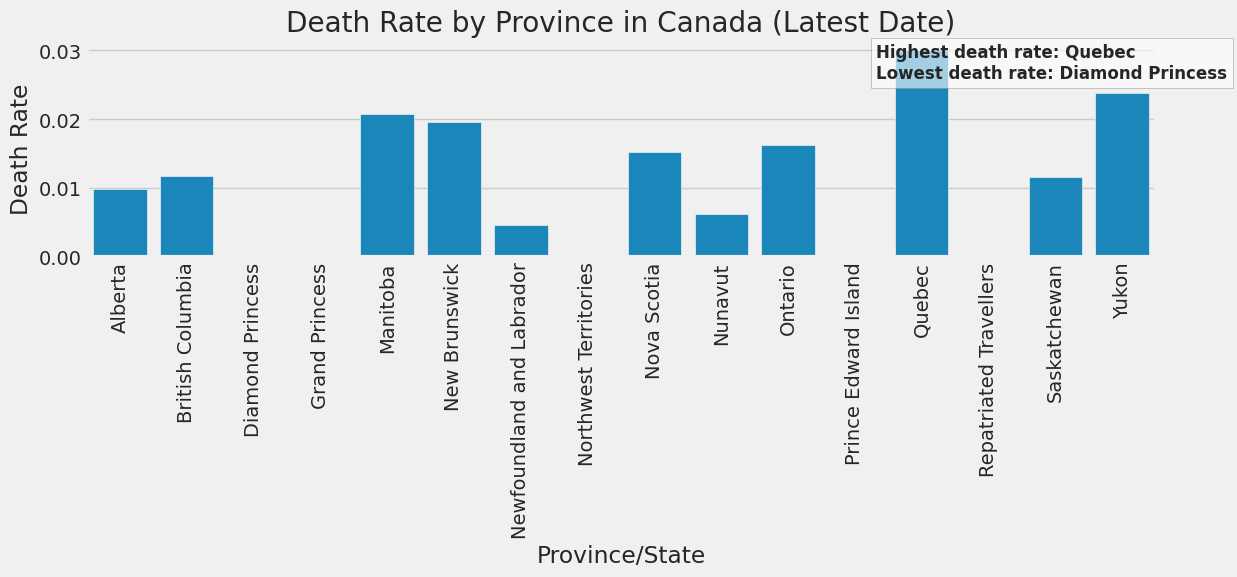

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_death_rate_by_province(confirmed_df, deaths_df, country):
    latest_date = confirmed_df.columns[-1]
    provinces_confirmed = confirmed_df[confirmed_df['Country/Region'] == country][['Province/State', latest_date]].copy()
    provinces_confirmed = provinces_confirmed.rename(columns={latest_date: 'Confirmed'})
    provinces_deaths = deaths_df[deaths_df['Country/Region'] == country][latest_date].values
    provinces_confirmed['Deaths'] = provinces_deaths
    provinces_confirmed['Death Rate'] = provinces_confirmed['Deaths'] / provinces_confirmed['Confirmed']
    provinces_confirmed['Death Rate'] = provinces_confirmed['Death Rate'].fillna(0).replace([float('inf')], 0)
    max_province = provinces_confirmed.loc[provinces_confirmed['Death Rate'].idxmax()]['Province/State']
    min_province = provinces_confirmed.loc[provinces_confirmed['Death Rate'].idxmin()]['Province/State']

    plt.figure(figsize=(12,6))
    sns.barplot(data=provinces_confirmed, x='Province/State', y='Death Rate')
    plt.title(f'Death Rate by Province in {country} (Latest Date)')
    plt.xticks(rotation=90)

    # Add bold annotations inside the plot
    textstr = (f"Highest death rate: {max_province}\n"
               f"Lowest death rate: {min_province}")
    plt.gcf().text(0.75, 0.85, textstr, fontsize=12, fontweight='bold',
                   bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

    plt.tight_layout()
    plt.show()

    return provinces_confirmed


canada_death_rates = analyze_death_rate_by_province(confirmed_df, deaths_df, 'Canada')


### Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this transformation be executed?

In [ ]:
# Melt deaths dataset to long format
deaths_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                            var_name='Date', value_name='Deaths')
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], errors='coerce', format='%m/%d/%y')
deaths_long = deaths_long.dropna(subset=['Date'])
deaths_long['Deaths'] = deaths_long['Deaths'].fillna(0)

### Q6.2: What is the total number of deaths reported per country up to the current date?

In [ ]:
# Total deaths per country (latest date)
total_deaths_country = deaths_long.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False)
print('Total deaths per country (top 10):')
print(total_deaths_country.head(10))

Total deaths per country (top 10):
Country/Region
US                594306.0
Brazil            461057.0
India             325972.0
Mexico            223455.0
United Kingdom    127775.0
Italy             126002.0
Russia            118781.0
France            108532.0
Germany            88413.0
Colombia           87747.0
Name: Deaths, dtype: float64


### Q6.3: What are the top 5 countries with the highest average daily deaths?

In [ ]:
# Calculate daily deaths per country (difference between consecutive days)
daily_deaths = deaths_long.sort_values(['Country/Region', 'Date']).groupby('Country/Region')['Deaths'].diff().fillna(0)

# Then calculate average daily deaths
avg_daily_deaths = daily_deaths.groupby(deaths_long['Country/Region']).mean()

# Top 5 countries
top5_avg_deaths = avg_daily_deaths.sort_values(ascending=False).head(5)

print('Top 5 countries with highest average daily deaths:')
print(top5_avg_deaths)



Top 5 countries with highest average daily deaths:
Country/Region
US        1203.048583
Brazil     933.313765
India      659.862348
Mexico     452.338057
Italy      255.064777
Name: Deaths, dtype: float64


### Q6.4: How have the total deaths evolved over time in the United States?

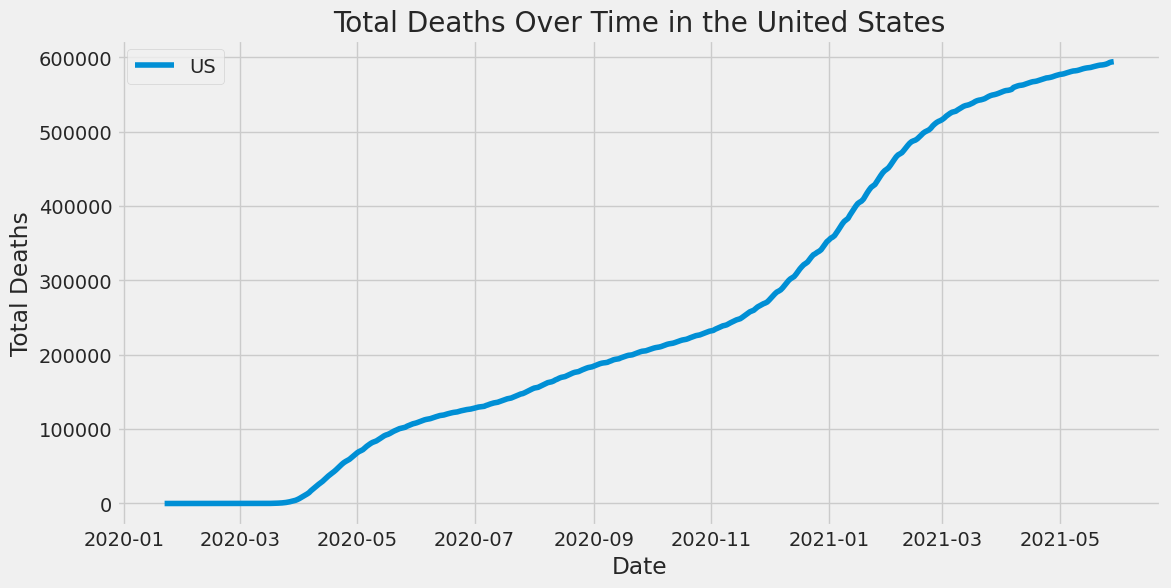

In [ ]:
# Evolution of total deaths in the US
deaths_us = deaths_long[deaths_long['Country/Region'] == 'US'].groupby('Date')['Deaths'].sum()
plt.figure(figsize=(12, 6))
plt.plot(deaths_us.index, deaths_us.values, label='US')
plt.title('Total Deaths Over Time in the United States')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

### Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

In [ ]:
# Transform confirmed and recovered to long format
confirmed_long = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                   var_name='Date', value_name='Confirmed')

confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'], format='%m/%d/%y', errors='coerce')
confirmed_long = confirmed_long.dropna(subset=['Date'])
confirmed_long['Confirmed'] = confirmed_long['Confirmed'].fillna(0)


recovered_long = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                   var_name='Date', value_name='Recovered')
recovered_long['Date'] = pd.to_datetime(recovered_long['Date'], format='%m/%d/%y', errors='coerce')
recovered_long = recovered_long.dropna(subset=['Date'])
recovered_long['Recovered'] = recovered_long['Recovered'].fillna(0)

# Merge datasets
merged = confirmed_long.merge(deaths_long, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'], how='outer')
merged = merged.merge(recovered_long, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'], how='outer')
merged[['Confirmed', 'Deaths', 'Recovered']] = merged[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

### Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic. [From the merged dataset]

In [ ]:
# Monthly sum for all countries
merged['Month'] = merged['Date'].dt.to_period('M')
monthly = merged.groupby(['Country/Region', 'Month'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
print('Monthly sum for all countries:')
display(monthly.head())

Monthly sum for all countries:


,Country/Region,Month,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01,0.0,0.0,0.0
1,Afghanistan,2020-02,6.0,0.0,0.0
2,Afghanistan,2020-03,1164.0,27.0,26.0
3,Afghanistan,2020-04,27074.0,890.0,2927.0
4,Afghanistan,2020-05,225674.0,5007.0,24129.0


### Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

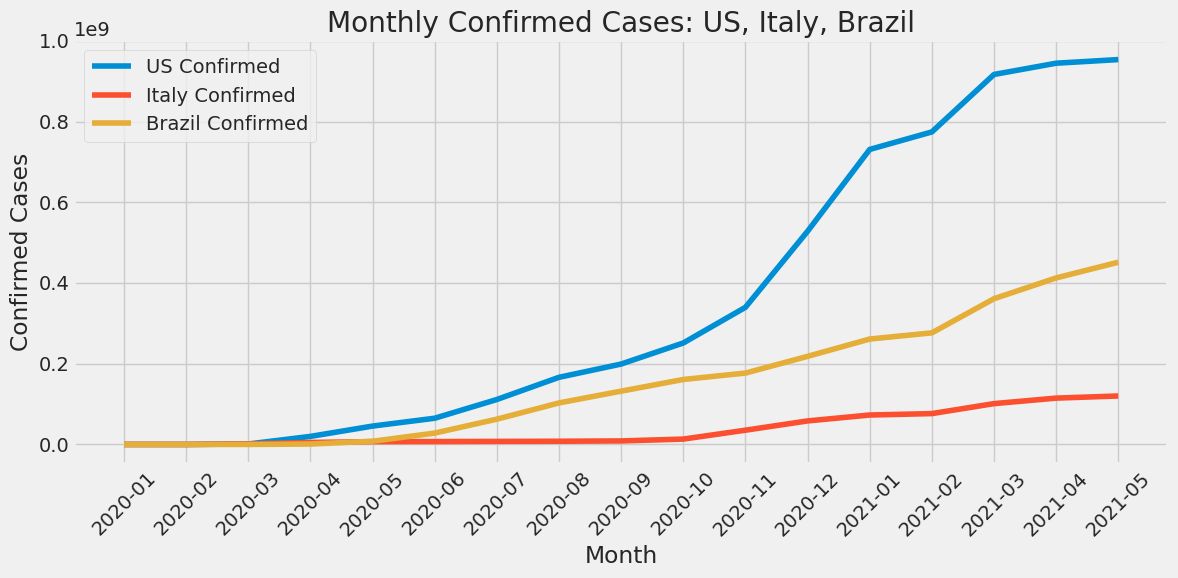

In [ ]:
# Monthly sum for US, Italy, Brazil
countries = ['US', 'Italy', 'Brazil']
for country in countries:
    country_monthly = monthly[monthly['Country/Region'] == country]
    plt.plot(country_monthly['Month'].astype(str), country_monthly['Confirmed'], label=f'{country} Confirmed')
plt.title('Monthly Confirmed Cases: US, Italy, Brazil')
plt.xlabel('Month')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [ ]:
# Filter for 2020
data_2020 = merged[(merged['Date'] >= '2020-01-01') & (merged['Date'] <= '2020-12-31')]
death_rate_2020 = data_2020.groupby('Country/Region').agg({
    'Deaths': 'sum',
    'Confirmed': 'sum'
}).apply(lambda row: row['Deaths'] / row['Confirmed'] if row['Confirmed'] > 0 else 0, axis=1)
top3_death_rate = death_rate_2020.sort_values(ascending=False).head(3)
print('Top 3 countries with highest average death rates in 2020:')
print(top3_death_rate)

Top 3 countries with highest average death rates in 2020:
Country/Region
Yemen         0.284965
MS Zaandam    0.221506
Mexico        0.100775
dtype: float64


### Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

In [ ]:
# South Africa: total recoveries vs deaths
sa = merged[merged['Country/Region'] == 'South Africa']
total_recovered = sa['Recovered'].max()
total_deaths = sa['Deaths'].max()
print(f"South Africa - Total Recoveries: {total_recovered}, Total Deaths: {total_deaths}")
if total_recovered > total_deaths:
    print('More recoveries than deaths: positive outcome.')
else:
    print('More deaths than recoveries: negative outcome.')

South Africa - Total Recoveries: 1554184.0, Total Deaths: 56363.0
More recoveries than deaths: positive outcome.


### Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

US highest monthly recovery ratio: 39.58% in 2020-10


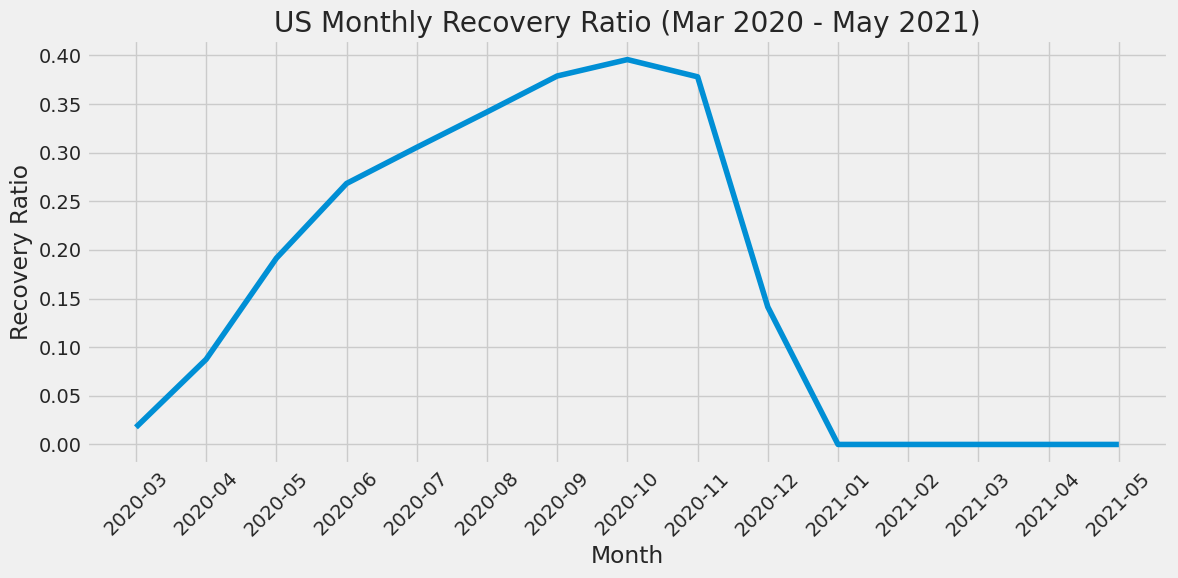

In [ ]:
# US monthly recovery ratio
us_monthly = monthly[monthly['Country/Region'] == 'US']
us_monthly = us_monthly[(us_monthly['Month'] >= '2020-03') & (us_monthly['Month'] <= '2021-05')]
us_monthly['Recovery Ratio'] = us_monthly['Recovered'] / us_monthly['Confirmed']
max_month = us_monthly.loc[us_monthly['Recovery Ratio'].idxmax()]['Month']
max_ratio = us_monthly['Recovery Ratio'].max()
print(f"US highest monthly recovery ratio: {max_ratio:.2%} in {max_month}")
plt.plot(us_monthly['Month'].astype(str), us_monthly['Recovery Ratio'])
plt.title('US Monthly Recovery Ratio (Mar 2020 - May 2021)')
plt.xlabel('Month')
plt.ylabel('Recovery Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()